# Reading Data

In [1]:
import pandas as pd
data = pd.read_csv('creditcard.csv')
data.shape
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocessing

In [2]:
print(data.isnull().mean()*100)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


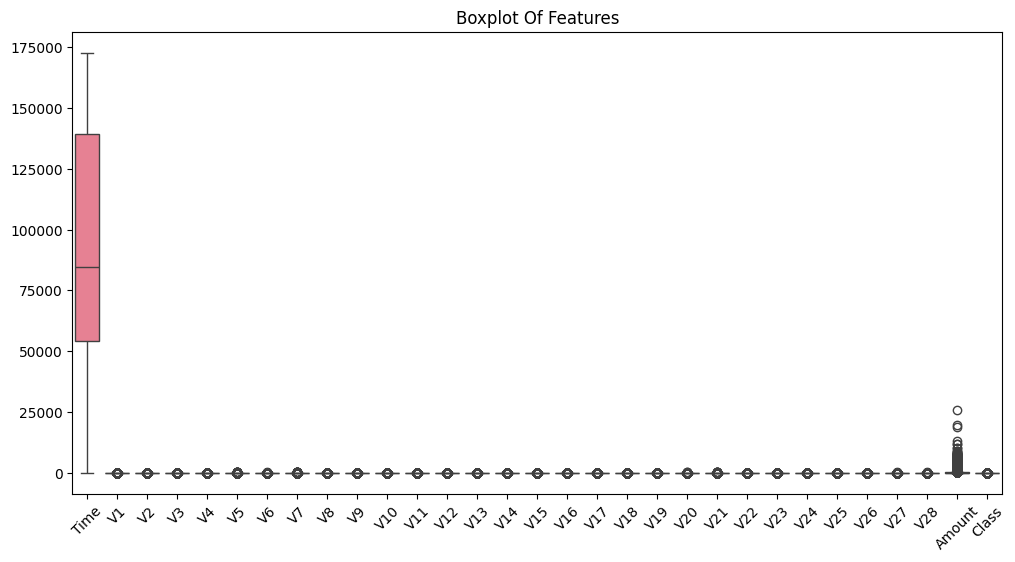

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot (data=data)
plt.xticks(rotation=45)
plt.title ('Boxplot Of Features')
plt.show()



In [4]:
numerics = data.select_dtypes(include='number')
correlation_matrix = data.corr()
print(correlation_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

In [5]:
corr_with_target = correlation_matrix ['Class'].sort_values(ascending=False)
print(corr_with_target)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [6]:
print(data['Class'].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [7]:
X = data.drop ('Class', axis=1)
y = data ['Class']

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)
x_test.shape

(56962, 30)

In [9]:
# Treating Imbalanced data

from imblearn.over_sampling import SMOTE

sm = SMOTE (random_state=42)
x_train_res, y_train_res = sm.fit_resample (x_train, y_train)

# Model Training

In [10]:
from lightgbm import LGBMClassifier

model = LGBMClassifier (n_estimators=1000, learning_rate=0.05, class_weight='balanced', random_state=42)


In [11]:
from lightgbm import early_stopping


model.fit (x_train_res, y_train_res)


[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=1000,
               random_state=42)

# Evaluation and Hypertuning

In [12]:
from sklearn.metrics import roc_auc_score, classification_report

y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:,1]

print("----base model----")
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print (classification_report(y_test, y_pred))

----base model----
ROC-AUC: 0.9798986913279661
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold


param_dist = {
    "n_estimators": [300,500],
    "learning_rate": [0.05, 0.1],
    "oversampling__sampling_strategy": [0.5, 1.0]
}

cv = StratifiedKFold (n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV (LGBMClassifier(random_state=42, class_weight="balanced"), param_dist, cv=cv, n_iter=20, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=42)

search.fit (x_train_res, y_train_res)

print ("Best AUC:", search.best_score_)
print ("Best params:", search.best_params_)

c:\Users\ASUS\Desktop\creditfraud\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Warning] Unknown parameter: oversampling__sampling_strategy
[LightGBM] [Warning] Unknown parameter: oversampling__sampling_strategy
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best AUC: 0.9999724044330878
Best params: {'oversampling__sampling_strategy': 0.5, 'n_estimators': 500, 'learning_rate': 0.05}


In [14]:
best_model = search.best_estimator_

y_pred_best = best_model.predict(x_test)
y_proba_best = best_model.predict_proba(x_test)[:,1]

print ("\n--- Tuned Model (RandomSearch) ---")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_best))
print(classification_report(y_test, y_pred_best))

[LightGBM] [Warning] Unknown parameter: oversampling__sampling_strategy
[LightGBM] [Warning] Unknown parameter: oversampling__sampling_strategy

--- Tuned Model (RandomSearch) ---
ROC-AUC: 0.9756093665659848
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.85      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# Saving Model

In [15]:
import joblib

joblib.dump (search, "best_model.pkl")

['best_model.pkl']